In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from jcopml.tuning import grid_search_params as gsp

In [3]:
df = pd.read_csv('train.csv')


In [ ]:
df.info()   


In [ ]:
df.describe()

In [ ]:
df.isna().sum()

In [4]:
# Find columns with categorical data
categorical_columns = df.select_dtypes(include='object').columns

# Fill missing values in categorical columns with the mode (most frequent value)
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
df.info()

In [5]:
df.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name              0
Transported       0
dtype: int64

In [6]:
# List of columns to fill missing values with median
columns_to_fill = ['Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Fill missing values with median for specific columns
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].median())


In [ ]:
df.head(8)

In [7]:
df = df.drop(columns=['Name','PassengerId'])

In [8]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [9]:
# Apply label encoding to categorical columns
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['HomePlanet', 'Cabin', 'Destination']
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Convert boolean columns to integers (0 and 1)
boolean_columns = ['CryoSleep', 'VIP', 'Transported']
df[boolean_columns] = df[boolean_columns].astype(int)

# Display the transformed DataFrame with numerical values
print(df)

      HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  RoomService  \
0              1          0    149            2  39.0    0          0.0   
1              0          0   2184            2  24.0    0        109.0   
2              1          0      1            2  58.0    1         43.0   
3              1          0      1            2  33.0    0          0.0   
4              0          0   2186            2  16.0    0        303.0   
...          ...        ...    ...          ...   ...  ...          ...   
8688           1          0    146            0  41.0    1          0.0   
8689           0          1   5280            1  18.0    0          0.0   
8690           0          0   5285            2  26.0    0          0.0   
8691           1          0   2131            0  32.0    0          0.0   
8692           1          0   2131            2  44.0    0        126.0   

      FoodCourt  ShoppingMall     Spa  VRDeck  Transported  
0           0.0           0.0     0.0 

In [10]:
d = sum(df['Transported'] == 1) / len(df['Transported'])
print(d)

0.5036236051995858


In [11]:
X = df.drop(columns='Transported')
y = df['Transported']

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [13]:


xgb_params = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0,0.25, 1, 5]
}





/Users/mymacbookair/Library/Python/3.9/lib/python/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


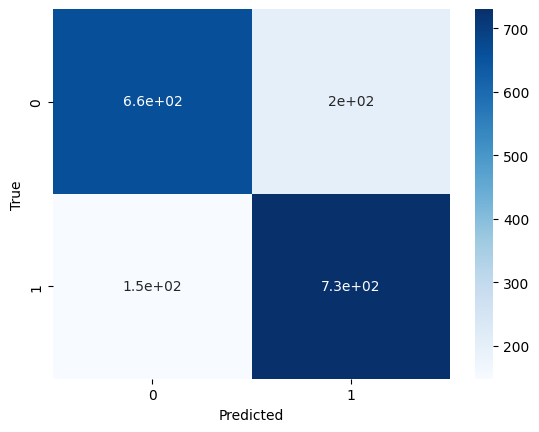

Accuracy: 0.7993099482461185
F1 score: 0.8070757324488667
Recall: 0.8314350797266514
Precision: 0.7841031149301826

 clasification report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79       861
           1       0.78      0.83      0.81       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



In [15]:
model = XGBClassifier(random_state=42,objective='binary:logistic',n_jobs=-1,early_stopping_rounds=10)
model.fit(X_train,y_train,eval_set=[(X_val,y_val)],eval_metric='error',verbose=0)

# use confusion matrix to evaluate predictions f1 score recall precision accuracy

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, classification_report
y_pred = model.predict(X_val)
cm = confusion_matrix(y_val, y_pred)

# cm display blue and yellow using matplotlib
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print ('Accuracy:', accuracy_score(y_val, y_pred))
print ('F1 score:', f1_score(y_val, y_pred))
print ('Recall:', recall_score(y_val, y_pred))
print ('Precision:', precision_score(y_val, y_pred))
print ('\n clasification report:\n', classification_report(y_val,y_pred))



In [17]:
# use grid search to find best parameters

grid = GridSearchCV(model, xgb_params, cv=4, scoring='accuracy', n_jobs=-1, verbose=0)
# Must have at least 1 validation dataset for early stopping
grid.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='error', verbose=0)
print(grid.best_params_)
print(grid.best_score_)

/Users/mymacbookair/Library/Python/3.9/lib/python/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/mymacbookair/Library/Python/3.9/lib/python/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/mymacbookair/Library/Python/3.9/lib/python/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/mymacbookair/Library/Python/3.9/lib/python/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in c

{'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
0.7968074518707431


/Users/mymacbookair/Library/Python/3.9/lib/python/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 0.7901092581943646
F1 score: 0.8032345013477089
Recall: 0.8485193621867881
Precision: 0.7625383828045036

 clasification report:
               precision    recall  f1-score   support

           0       0.83      0.73      0.78       861
           1       0.76      0.85      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



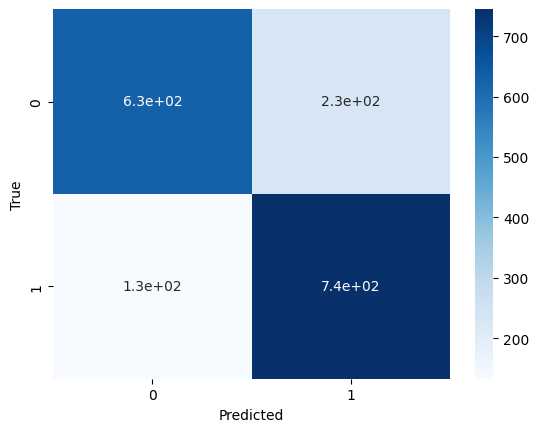

In [18]:
# use best parameters to train model to get best accuracy
# {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
booster = XGBClassifier(random_state=42,objective='binary:logistic',n_jobs=-1,early_stopping_rounds=10,colsample_bytree=1.0,gamma=0,learning_rate=0.1,max_depth=5,n_estimators=100,subsample=0.8)
booster.fit(X_train,y_train,eval_set=[(X_val,y_val)],eval_metric='error',verbose=0)
y_pred = booster.predict(X_val)
print ('Accuracy:', accuracy_score(y_val, y_pred))
print ('F1 score:', f1_score(y_val, y_pred))
print ('Recall:', recall_score(y_val, y_pred))
print ('Precision:', precision_score(y_val, y_pred))
print ('\n clasification report:\n', classification_report(y_val,y_pred))

# use confusion matrix to evaluate predictions f1 score recall precision accuracy
cm = confusion_matrix(y_val, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



In [19]:
test_data = pd.read_csv('test.csv')
# Find columns with categorical data
categorical_columns = test_data.select_dtypes(include='object').columns

# Fill missing values in categorical columns with the mode (most frequent value)
for col in categorical_columns:
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)

# List of columns to fill missing values with median
columns_to_fill = ['Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Fill missing values with median for specific columns
test_data[columns_to_fill] = test_data[columns_to_fill].fillna(test_data[columns_to_fill].median())

test_data = test_data.drop(columns=['Name','PassengerId'])

categorical_columns = ['HomePlanet', 'Cabin', 'Destination']
label_encoder = LabelEncoder()
for col in categorical_columns:
    test_data[col] = label_encoder.fit_transform(test_data[col])




In [20]:
# Convert boolean columns to integers (0 and 1)
boolean_columns = ['CryoSleep', 'VIP']
test_data[boolean_columns] = test_data[boolean_columns].astype(int)

In [21]:
# predict test_data using random forest
predictions = booster.predict(test_data)

predictions = pd.DataFrame(predictions, columns=['Transported'])
submission = pd.read_csv('test.csv')
submission = submission[['PassengerId']]
submission = pd.concat([submission, predictions], axis=1)
#change the Transported from 0 and 1 to False and True
submission['Transported'] = submission['Transported'].replace({0: False, 1: True})
submission.to_csv('xgb_submission.csv', index=False)

In [22]:
predictions


,Transported
0,1
1,0
2,1
3,1
4,1
...,...
4272,1
4273,0
4274,1
4275,1


In [24]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_val)
print ('Accuracy:', accuracy_score(y_val, y_pred))

knn_submission = knn.predict(test_data)
knn_submission = pd.DataFrame(knn_submission, columns=['Transported'])
submission = pd.read_csv('test.csv')
submission = submission[['PassengerId']]
submission = pd.concat([submission, knn_submission], axis=1)
#change the Transported from 0 and 1 to False and True
submission['Transported'] = submission['Transported'].replace({0: False, 1: True})

submission.to_csv('knn_submission.csv', index=False)



Accuracy: 0.7596319723979299


In [25]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_val)
print ('Accuracy:', accuracy_score(y_val, y_pred))

Accuracy: 0.7734330074755607


In [26]:
rf_submission = rf.predict(test_data)
rf_submission = pd.DataFrame(rf_submission, columns=['Transported'])
submission = pd.read_csv('test.csv')
submission = submission[['PassengerId']]
submission = pd.concat([submission, rf_submission], axis=1)
#change the Transported from 0 and 1 to False and True
submission['Transported'] = submission['Transported'].replace({0: False, 1: True})

submission.to_csv('rf_submission.csv', index=False)

In [27]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_val)
print ('Accuracy:', accuracy_score(y_val, y_pred))


Accuracy: 0.7671075330649799


/Users/mymacbookair/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
log_reg_submission = log_reg.predict(test_data)
log_reg_submission = pd.DataFrame(log_reg_submission, columns=['Transported'])
submission = pd.read_csv('test.csv')
submission = submission[['PassengerId']]
submission = pd.concat([submission, log_reg_submission], axis=1)
#change the Transported from 0 and 1 to False and True
submission['Transported'] = submission['Transported'].replace({0: False, 1: True})

submission.to_csv('log_reg_submission.csv', index=False)

In [29]:
svm = SVC(random_state=42)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_val)
print ('Accuracy:', accuracy_score(y_val, y_pred))


Accuracy: 0.7705577918343876


In [30]:
svm_submission = svm.predict(test_data)
svm_submission = pd.DataFrame(svm_submission, columns=['Transported'])
submission = pd.read_csv('test.csv')
submission = submission[['PassengerId']]
submission = pd.concat([submission, svm_submission], axis=1)
#change the Transported from 0 and 1 to False and True
submission['Transported'] = submission['Transported'].replace({0: False, 1: True})

submission.to_csv('svm_submission.csv', index=False)